In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

## Part 1: 读取并显示图片

导入必要的库、函数、等工具

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import skimage as ski

设置演示图片路径

In [3]:
img_url_path = "/content/drive/MyDrive/colab_data/zuowm.png"

读取图片并进行必要的预处理

(236, 236, 3)
float32


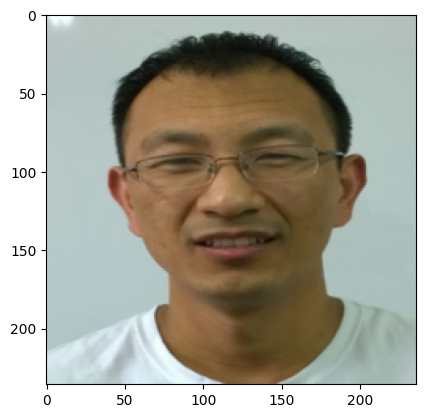

In [4]:
frame = ski.io.imread(img_url_path)
frame = np.float32(frame) / 255
frame = ski.transform.resize(frame[:, :, 0:3], (236, 236))

print(frame.shape)
print(frame.dtype)

plt.imshow(frame)

以灰度图的形式分别显示已读入图片的R、G、B三个通道

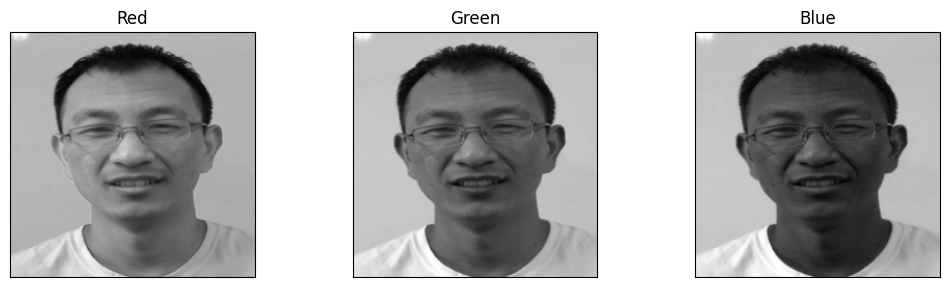

In [5]:
fig = plt.figure(figsize=(12, 12));
fig.subplots_adjust(hspace=0.4, wspace=0.4);

ax = fig.add_subplot(1, 3, 1);
ax.set_title('Red');
ax.imshow(frame[:,:,0], cmap="gray");
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(1, 3, 2);
ax.set_title('Green');
ax.imshow(frame[:,:,1], cmap="gray");
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(1, 3, 3);
ax.set_title('Blue');
ax.imshow(frame[:,:,2], cmap="gray");
ax.set_xticks([]); ax.set_yticks([]);

以三维形式分别显示已读入图片的R、G、B三个通道

(236, 236) int64
(236, 236) int64


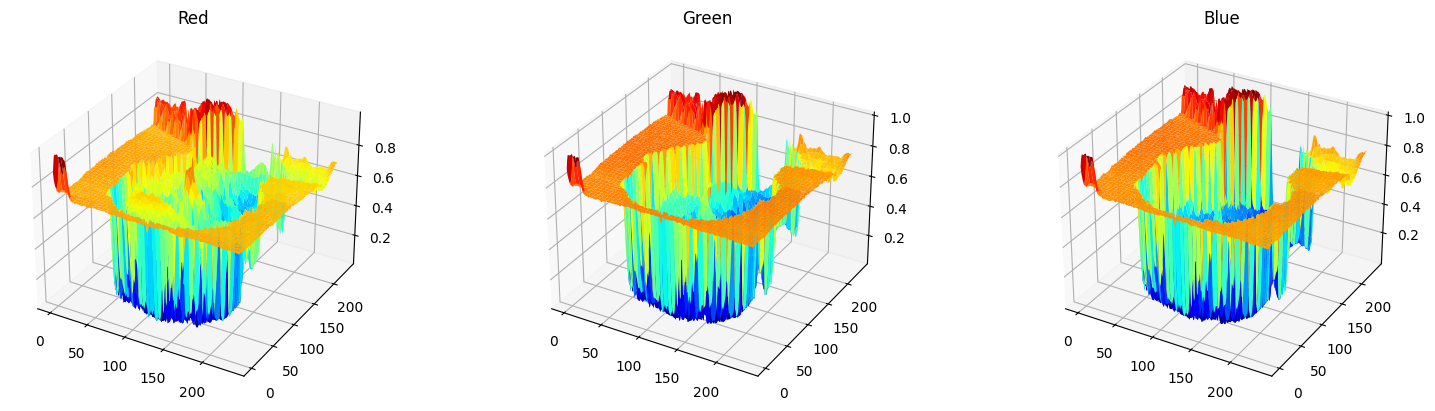

In [6]:
x = range(frame.shape[0]);
y = range(frame.shape[1]);

X, Y = np.meshgrid(x, y);

print(X.shape, X.dtype)
print(Y.shape, Y.dtype)

fig = plt.figure(figsize=(18, 18));
fig.subplots_adjust(hspace=0.4, wspace=0.4);

ax = fig.add_subplot(1, 3, 1, projection='3d');
ax.set_title('Red');
ax.plot_surface(X, Y, frame[:,:,0], cmap='jet');
# ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(1, 3, 2, projection='3d');
ax.set_title('Green');
ax.plot_surface(X, Y, frame[:,:,1], cmap='jet');
# ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(1, 3, 3, projection='3d');
ax.set_title('Blue');
ax.plot_surface(X, Y, frame[:,:,2], cmap='jet');
# ax.set_xticks([]); ax.set_yticks([]);


## Part 2: 像素点处理

对图片中各个像素点独立进行处理

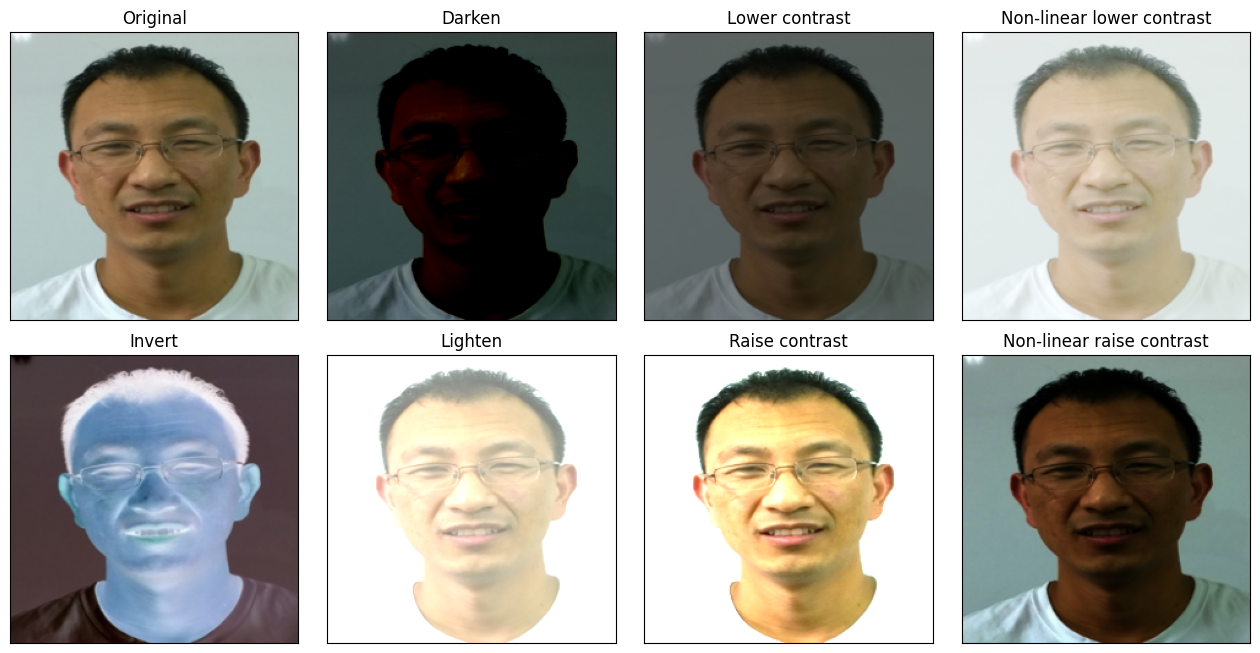

In [7]:
fig = plt.figure(figsize=(16, 8));
fig.subplots_adjust(hspace=0.1, wspace=0.1);

ax = fig.add_subplot(2, 4, 1);
ax.set_title('Original');
ax.imshow(frame);
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 2);
ax.set_title('Darken');
ax.imshow(np.clip(frame - 0.5, 0, 1));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 3);
ax.set_title('Lower contrast');
ax.imshow(frame / 2);
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 4);
ax.set_title('Non-linear lower contrast');
ax.imshow(frame**(1/3));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 5);
ax.set_title('Invert');
ax.imshow(1 - frame);
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 6);
ax.set_title('Lighten');
ax.imshow(np.clip(frame + 0.5, 0, 1));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 7);
ax.set_title('Raise contrast');
ax.imshow(np.clip(frame * 2, 0, 1));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 8);
ax.set_title('Non-linear raise contrast');
ax.imshow(frame**2);
ax.set_xticks([]); ax.set_yticks([]);

## Part 3: 卷积处理（\`linear shift-invariant image filtering\`）

对图片应用BoxFilter并显示结果（模糊）

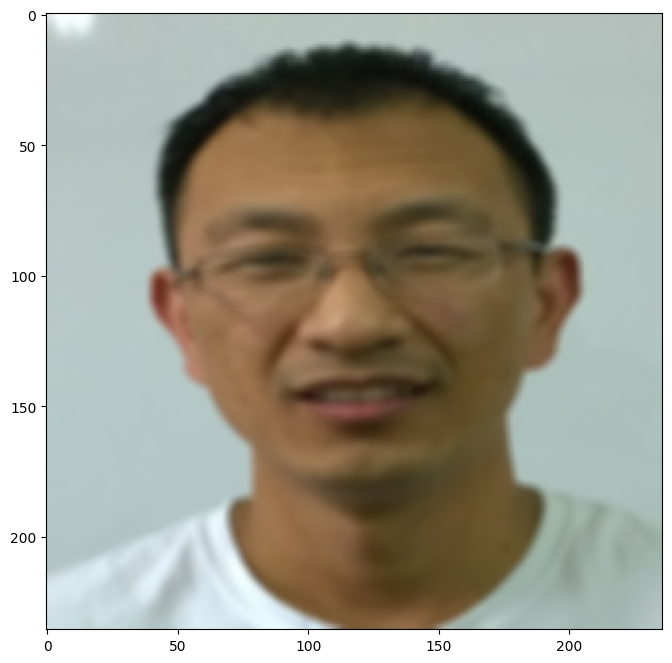

In [8]:
fig = plt.figure(figsize=(16, 8));

# Box Filter
# N = 10;
N = 4;
g = np.ones((N, N))/(N**2);

image = cv2.filter2D(frame, -1, g);
plt.imshow(image);

对图片应用SharpeningFilter并显示结果（锐化）

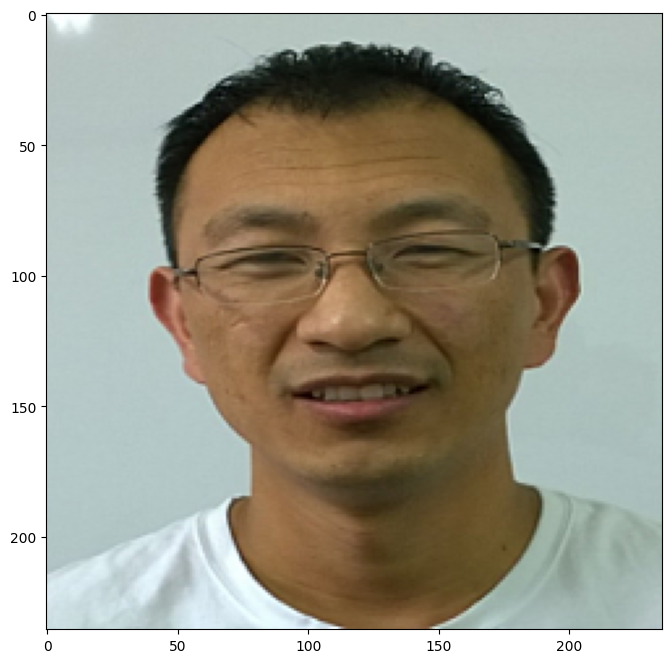

In [9]:
fig = plt.figure(figsize=(16, 8));

# Sharpening Filter
N = 3;
g = -np.ones((N,N))/(N**2);
g[(N-1)//2,(N-1)//2] += 2;

image = cv2.filter2D(frame,-1,g);
plt.imshow(np.clip(image,0,1),cmap='gray');

## Part 4: 图片梯度提取

通过不同的卷积核突出显示图片边缘

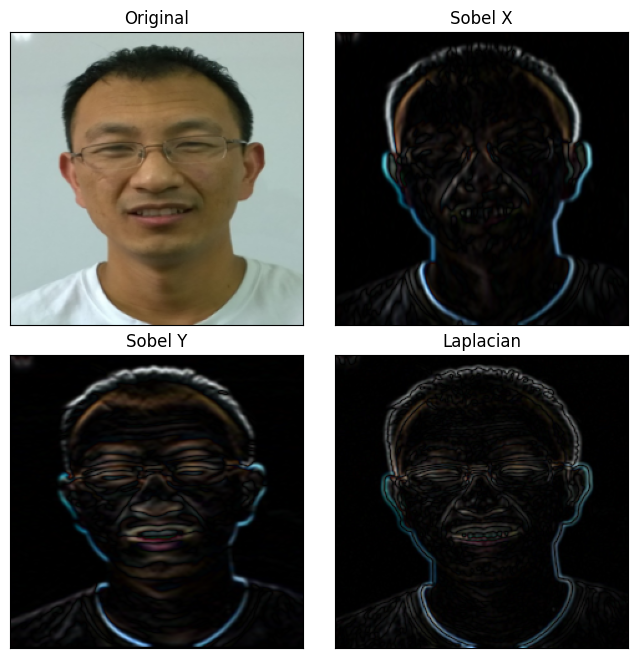

In [10]:
k = 7 # Kernel size

laplacian = cv2.Laplacian(frame,-1,ksize=k)
sobel_x = cv2.Sobel(frame,-1,1,0,ksize=k)
sobel_y = cv2.Sobel(frame,-1,0,1,ksize=k)

fig = plt.figure(figsize=(8, 8));
fig.subplots_adjust(hspace=0.1, wspace=0.1);

ax = fig.add_subplot(2, 2, 1);
ax.set_title('Original');
ax.imshow((frame), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 2);
ax.set_title('Sobel X');
ax.imshow(np.abs(sobel_x)/np.abs(sobel_x).max(), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 3);
ax.set_title('Sobel Y');
ax.imshow(np.abs(sobel_y)/np.abs(sobel_y).max(), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 4);
ax.set_title('Laplacian');
ax.imshow(np.abs(laplacian)/np.abs(laplacian).max(), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

In [11]:
# end